<a href="https://colab.research.google.com/github/barcygan/python/blob/master/IMGW_api_pogoda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

# defining api path 
url = 'https://danepubliczne.imgw.pl/api/data/synop'
#r=requests.get(url)
#data = json.loads(r.data.decode('utf-8'))
#plik = r.json()


#creating dataframe directly from api json call
dataframe = pd.read_json(url)

#dodanie serii danych średniej temperatury


In [87]:
class Pogoda():
  def __init__(self, df):
    self.df = df
    self.srednia_temperatura = df['temperatura'].mean()
    self.srednie_cisnienie = df['cisnienie'].mean()
    self.df['srednia_temperatura'] = df['temperatura'].mean()
    self.df['srednie_cisnienie'] = df['cisnienie'].mean()

  def temperature_bar_overall(self):
    plt.style.use('seaborn')
    fig,ax = plt.subplots(figsize=(25,5))
    ax.bar(self.df['stacja'],self.df['temperatura'])
    ax.plot(self.df['stacja'],self.df['srednia_temperatura'], color = 'red')
    fig.autofmt_xdate()
    plt.show()

  def pressure_bar_overall(self):
    plt.style.use('seaborn')
    fig,ax = plt.subplots(figsize=(25,5))
    ax.bar(self.df['stacja'],self.df['cisnienie'])
    ax.plot(self.df['stacja'],self.df['srednie_cisnienie'], color = 'red')
    fig.autofmt_xdate()
    plt.show()


  

In [93]:
a = Pogoda(dataframe)

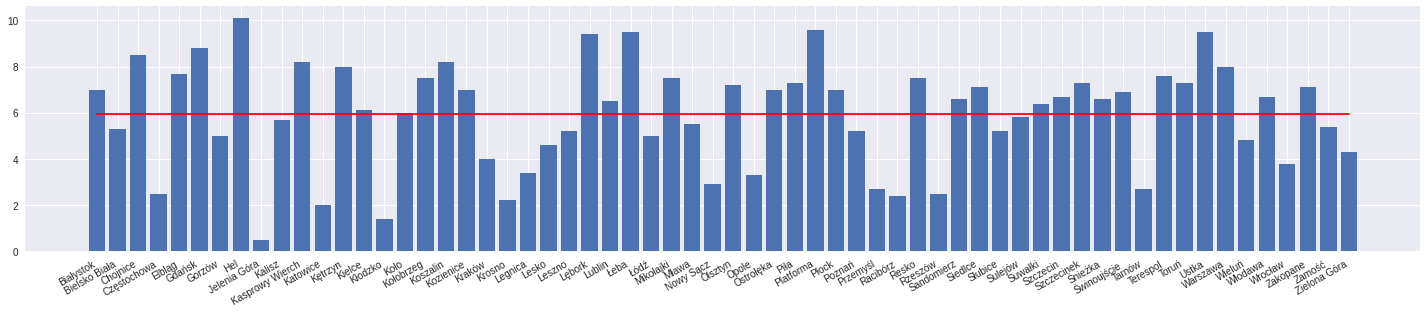

In [94]:
a.temperature_bar_overall()